In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv("sph6004_assignment1_data.csv")
data.head(5)

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,temperature_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,lactate_min,lactate_max,ph_min,ph_max,so2_min,so2_max,po2_min,po2_max,pco2_min,pco2_max,aado2_min,aado2_max,aado2_calc_min,aado2_calc_max,pao2fio2ratio_min,pao2fio2ratio_max,baseexcess_min,baseexcess_max,bicarbonate_min,bicarbonate_max,totalco2_min,totalco2_max,hematocrit_min,hematocrit_max,hemoglobin_min,hemoglobin_max,carboxyhemoglobin_min,carboxyhemoglobin_max,methemoglobin_min,methemoglobin_max,temperature_min.1,temperature_max.1,chloride_min,chloride_max,calcium_min,calcium_max,glucose_min.1,glucose_max.1,potassium_min,potassium_max,sodium_min,sodium_max,hematocrit_min.1,hematocrit_max.1,hemoglobin_min.1,hemoglobin_max.1,platelets_min,platelets_max,wbc_min,wbc_max,albumin_min,albumin_max,globulin_min,globulin_max,total_protein_min,total_protein_max,aniongap_min,aniongap_max,bicarbonate_min.1,bicarbonate_max.1,bun_min,bun_max,calcium_min.1,calcium_max.1,chloride_min.1,chloride_max.1,glucose_min.2,glucose_max.2,sodium_min.1,sodium_max.1,potassium_min.1,potassium_max.1,abs_basophils_min,abs_basophils_max,abs_eosinophils_min,abs_eosinophils_max,abs_lymphocytes_min,abs_lymphocytes_max,abs_monocytes_min,abs_monocytes_max,abs_neutrophils_min,abs_neutrophils_max,atyps_min,atyps_max,bands_min,bands_max,imm_granulocytes_min,imm_granulocytes_max,metas_min,metas_max,nrbc_min,nrbc_max,d_dimer_min,d_dimer_max,fibrinogen_min,fibrinogen_max,thrombin_min,thrombin_max,inr_min,inr_max,pt_min,pt_max,ptt_min,ptt_max,alt_min,alt_max,alp_min,alp_max,ast_min,ast_max,amylase_min,amylase_max,bilirubin_total_min,bilirubin_total_max,bilirubin_direct_min,bilirubin_direct_max,bilirubin_indirect_min,bilirubin_indirect_max,ck_cpk_min,ck_cpk_max,ck_mb_min,ck_mb_max,ggt_min,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,36570066,3,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,116.136364,40.0,58.0,47.863636,56.0,69.0,63.090909,13.0,24.0,16.833333,35.89,36.39,36.222000,96.0,100.0,98.916667,76.0,211.0,146.2,2.3,2.3,7.40,7.40,98.0,98.0,101.0,101.0,47.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,30.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,5.2,5.2,129.0,129.0,27.8,29.2,9.2,9.8,304.0,333.0,11.0,14.3,2.6,2.9,NaN,NaN,NaN,NaN,15.0,20.0,23.0,28.0,47.0,52.0,8.1,9.0,93.0,101.0,76.0,167.0,131.0,138.0,4.8,6.7,0.0000,0.0000,0.0000,0.3300,0.2200,0.8220,0.5480,0.8800,7.8100,10.5490,0.0,0.0,5.0,11.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.1,11.9,12.0,28.6,29.5,103.0,133.0,992.0,1199.0,106.0,196.0,NaN,NaN,6.8,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.0,318.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,39307659,0,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,109.833333,56.0,89.0,70.166667,65.0,96.0,79.555556,17.0,38.0,29.611111,36.28,37.00,36.558000,91.0,98.0,95.444444,127.0,132.0,129.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.3,39.5,12.1,13.0,199.0,247.0,12.0,14.9,3.7,3.9,NaN,NaN,NaN,NaN,13.0,22.0,19.0,29.0,23.0,30.0,7.9,8.4,89.0,93.0,127.0,143.0,126.0,132.0,2.9,4.5,0.0294,0.0294,0.0147,0.0147,1.5141,1.5141,0.5586,0.5586,12.5832,12.5832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,2.3,20.0,24.7,28.4,150.0,272.0,384.0,282.0,331.0,183.0,356.0,NaN,NaN,1.9,2.9,NaN,NaN,NaN,NaN,175.0,175.0,8.0,8.0,NaN,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,82.0
2,38743306,2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,112.153846,56.0,99.0,73.307692,69.0,108.0,85.692308,14.0,19.0,16.000000,36.67,37.00,36.805000,94.0,100.0,97.166667,207.0,305.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Show the infor of original dataset
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 162 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    id                      50920 non-null  int64  
 1    aki                     50920 non-null  int64  
 2    gender                  50920 non-null  object 
 3    admission_age           50920 non-null  float64
 4    race                    50920 non-null  object 
 5    heart_rate_min          50841 non-null  float64
 6    heart_rate_max          50841 non-null  float64
 7    heart_rate_mean         50841 non-null  float64
 8    sbp_min                 50823 non-null  float64
 9    sbp_max                 50823 non-null  float64
 10   sbp_mean                50823 non-null  float64
 11   dbp_min                 50823 non-null  float64
 12   dbp_max                 50823 non-null  float64
 13   dbp_mean                50823 non-null  float64
 14   mbp_min             

In [ ]:
# Show the number of aki in different stages
data["aki"].value_counts()

0    16860
2    16288
1     9838
3     7934
Name: aki, dtype: int64

**Data Preprocessing**

In [ ]:
## Make a copy of dataset
data_copy = data.copy()

In [ ]:
# Encoding gender into numerical value
gender_encoding = {'F': 0, 'M': 1}
data_copy['gender'] = data_copy['gender'].replace(gender_encoding).astype(float)

# Encoding aki into binary
aki_encoding = {0: 0, 1: 1, 2: 1, 3: 1}
data_copy['aki'] = data_copy['aki'].replace(aki_encoding).astype(float)

In [ ]:
# Encoding race into numerical value
label_encoder = LabelEncoder()
data_copy['race'] = label_encoder.fit_transform(data_copy['race']).astype(float)

In [ ]:
data_copy["race"].value_counts()

28.0    32637
27.0     5579
7.0      3845
22.0     1745
31.0      918
26.0      726
1.0       614
3.0       547
18.0      530
10.0      501
32.0      430
23.0      371
14.0      337
8.0       319
9.0       282
6.0       194
5.0       168
24.0      161
2.0       121
30.0      119
15.0      101
29.0      100
0.0        87
21.0       81
19.0       74
17.0       52
20.0       49
25.0       46
4.0        46
13.0       40
12.0       39
16.0       33
11.0       28
Name: race, dtype: int64

In [ ]:
# Drop the useless column 'id'
data_copy = data_copy.drop('id', axis=1)

In [ ]:
# Remove variables with over 30% missing values
variables_to_drop = data_copy.columns[data_copy.isnull().mean() > 0.3]
data_copy = data_copy.drop(columns=variables_to_drop)

In [ ]:
# Remove patients with over 30% missing values
data_copy = data_copy.dropna(thresh=0.7 * len(data_copy.columns))

In [ ]:
# Show the infor of modified dataset
data_copy.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50420 entries, 0 to 50919
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aki                50420 non-null  float64
 1   gender             50420 non-null  float64
 2   admission_age      50420 non-null  float64
 3   race               50420 non-null  float64
 4   heart_rate_min     50420 non-null  float64
 5   heart_rate_max     50420 non-null  float64
 6   heart_rate_mean    50420 non-null  float64
 7   sbp_min            50411 non-null  float64
 8   sbp_max            50411 non-null  float64
 9   sbp_mean           50411 non-null  float64
 10  dbp_min            50411 non-null  float64
 11  dbp_max            50411 non-null  float64
 12  dbp_mean           50411 non-null  float64
 13  mbp_min            50395 non-null  float64
 14  mbp_max            50395 non-null  float64
 15  mbp_mean           50395 non-null  float64
 16  resp_rate_min      503

In [ ]:
# Multivariate Imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(data_copy)

In [ ]:
imputed_df = pd.DataFrame(imputed_data, columns=data_copy.columns)
imputed_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50420 entries, 0 to 50419
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aki                50420 non-null  float64
 1   gender             50420 non-null  float64
 2   admission_age      50420 non-null  float64
 3   race               50420 non-null  float64
 4   heart_rate_min     50420 non-null  float64
 5   heart_rate_max     50420 non-null  float64
 6   heart_rate_mean    50420 non-null  float64
 7   sbp_min            50420 non-null  float64
 8   sbp_max            50420 non-null  float64
 9   sbp_mean           50420 non-null  float64
 10  dbp_min            50420 non-null  float64
 11  dbp_max            50420 non-null  float64
 12  dbp_mean           50420 non-null  float64
 13  mbp_min            50420 non-null  float64
 14  mbp_max            50420 non-null  float64
 15  mbp_mean           50420 non-null  float64
 16  resp_rate_min      504

In [ ]:
# Make a copy of imputed dataframe
idata = imputed_df.copy()

In [ ]:
# Show the number of aki vs non-aki
idata["aki"].value_counts()

1.0    33870
0.0    16550
Name: aki, dtype: int64

In [ ]:
idata.describe()

,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,temperature_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,hematocrit_min.1,hematocrit_max.1,hemoglobin_min.1,hemoglobin_max.1,platelets_min,platelets_max,wbc_min,wbc_max,aniongap_min,aniongap_max,bicarbonate_min.1,bicarbonate_max.1,bun_min,bun_max,calcium_min.1,calcium_max.1,chloride_min.1,chloride_max.1,glucose_min.2,glucose_max.2,sodium_min.1,sodium_max.1,potassium_min.1,potassium_max.1,inr_min,inr_max,pt_min,pt_max,ptt_min,ptt_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,weight_admit
count,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.00000,50420.000000,50420.000000,50420.000000,50420.000000,50420.00000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000,50420.000000
mean,0.671757,0.558985,64.973585,24.518009,69.917279,102.523241,84.280095,93.190363,148.252648,119.072922,47.294918,88.360859,63.846617,60.108046,105.405484,79.020166,12.316769,27.557271,18.987144,36.297850,37.343712,36.827765,91.798656,99.421014,96.815952,150.508155,837.156015,288.720436,31.256064,35.468949,10.411066,11.716030,191.35283,226.973737,10.371425,13.963692,13.036799,16.10157,21.880565,24.420258,21.918657,26.023334,8.180716,8.605360,102.200714,105.835639,119.485724,163.464468,136.993496,139.753922,3.922689,4.517997,1.306315,1.519796,14.340731,16.536998,31.113771,41.850741,13.701928,5.161706,3.388438,3.122751,0.205933,81.577160
std,0.469578,0.496514,17.250150,7.546647,15.112018,20.465743,15.704599,17.475993,22.702759,16.328910,11.698779,19.650659,11.263254,13.779224,24.870678,11.172366,3.543564,6.361058,3.717855,0.701812,0.703560,0.520924,6.524638,1.377601,2.405665,6297.498871,25570.729073,8366.987410,6.691507,6.121100,2.281993,2.132353,98.00843,108.841177,8.012484,11.623463,3.512978,4.87495,4.587194,4.034561,18.435583,21.485675,0.822018,0.879321,6.155847,6.058585,40.860579,99.446529,5.015380,4.707891,0.557153,0.817815,0.550678,1.011056,5.477360,10.023921,11.254530,27.750128,2.646631,1.662464,2.084556,1.105073,0.403865,35.951559
min,0.000000,0.000000,18.002527,0.000000,1.000000,36.000000,28.500000,0.108000,34.000000,32.000000,1.000000,20.000000,19.500000,1.000000,26.000000,24.500000,1.000000,6.000000,6.000000,15.000000,26.670000,26.670000,1.000000,42.000000,41.384615,-0.238961,-3062.297522,-357.386263,4.300000,12.500000,1.300000,3.500000,5.00000,5.000000,0.100000,0.100000,-9.000000,3.00000,2.000000,5.000000,1.000000,1.000000,0.800000,2.600000,46.000000,67.000000,5.000000,7.000000,74.000000,97.000000,0.800000,1.600000,0.600000,0.600000,8.000000,8.000000,2.700000,16.600000,3.000000,1.000000,0.000000,0.981150,0.000000,1.000000
25%,0.000000,0.000000,54.557939,27.000000,60.000000,88.000000,73.250000,83.000000,133.000000,107.458036,40.000000,75.000000,56.000000,53.000000,91.000000,71.307692,10.000000,23.000000,16.391135,36.110000,36.940000,36.601667,91.000000,99.000000,95.700000,88.000000,123.000000,110.500000,26.300000,31.000000,8.700000,10.200000,127.00000,158.000000,6.800000,8.800000,11.000000,13.00000,20.000000,22.000000,11.000000,14.000000,7.700000,8.109806,99.000000,102.000000,95.000000,113.000000,135.000000,137.000000,3.600000,4.000000,1.100000,1.100000,12.000

**Data Spltting**

In [ ]:
# X contains the features, y contains the labels
X = idata.drop('aki', axis=1)
y = idata ['aki']

# Split the data into training and test sets in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#X_traini, X_val, y_traini, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 40336
Test set size: 10084


In [ ]:
y_train.value_counts()

1.0    27123
0.0    13213
Name: aki, dtype: int64

In [ ]:
y_test.value_counts()

1.0    6747
0.0    3337
Name: aki, dtype: int64

**Resampling using SMOTE**

In [ ]:
smote_sampler = SMOTE(random_state=12, sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote_sampler.fit_resample(X_train, y_train)

In [ ]:
y_train_SMOTE.value_counts()

1.0    27123
0.0    27123
Name: aki, dtype: int64

**Normalization**

In [ ]:
scaler = MinMaxScaler()

X_nor_train_SMOTE = scaler.fit_transform(X_train_SMOTE)
X_nor_test = scaler.transform(X_test)

X_nor_train_SMOTE = pd.DataFrame(X_nor_train_SMOTE, columns=idata.columns[1:])
X_nor_test = pd.DataFrame(X_nor_test, columns=idata.columns[1:])

**Feature Selection**

In [ ]:
# Feature selection
selector = SelectFromModel(LogisticRegression(C = 0.03, penalty = 'l1', solver = 'liblinear'))
selector.fit(X_nor_train_SMOTE, y_train_SMOTE)
selector.get_feature_names_out()

array(['gender', 'admission_age', 'heart_rate_max', 'sbp_min', 'sbp_max',
       'dbp_min', 'mbp_min', 'mbp_max', 'resp_rate_min', 'resp_rate_max',
       'resp_rate_mean', 'temperature_min', 'temperature_max',
       'hematocrit_max.1', 'hemoglobin_min.1', 'aniongap_max',
       'bicarbonate_min.1', 'bicarbonate_max.1', 'bun_min',
       'calcium_min.1', 'chloride_min.1', 'chloride_max.1',
       'potassium_max.1', 'pt_max', 'ptt_max', 'gcs_min', 'gcs_motor',
       'gcs_verbal', 'gcs_eyes', 'weight_admit'], dtype=object)

In [ ]:
print(len(selector.get_feature_names_out()))

30


In [ ]:
X_Train = selector.transform(X_nor_train_SMOTE)
X_Test = selector.transform(X_nor_test)
y_Train = y_train_SMOTE
y_Test = y_test

**Model Training**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, RocCurveDisplay, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'roc_auc': make_scorer(roc_auc_score),
    'specificity': make_scorer(specificity_score)
}

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

**LR**

In [ ]:
lr_clf = LogisticRegression(penalty = 'l1', solver='saga', random_state=42)
lr_result = cross_validate(lr_clf, X_Train, y_Train, cv=kf, scoring=scoring, return_estimator=True)

print(f"Mean Accuracy: {lr_result['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {lr_result['test_precision'].mean():.4f}")
print(f"Mean Recall: {lr_result['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {lr_result['test_f1'].mean():.4f}")
print(f"Mean AUC-ROC Score: {lr_result['test_roc_auc'].mean():.4f}")
print(f"Mean Specificity: {lr_result['test_specificity'].mean():.4f}")

Mean Accuracy: 0.6961
Mean Precision: 0.7031
Mean Recall: 0.6789
Mean F1 Score: 0.6908
Mean AUC-ROC Score: 0.6961
Mean Specificity: 0.7134


In [ ]:
lr_y_pred = cross_val_predict(lr_clf, X_Train, y_Train, cv=kf)
lr_cm = confusion_matrix(y_Train, lr_y_pred)
lr_cm

array([[19349,  7774],
       [ 8710, 18413]])

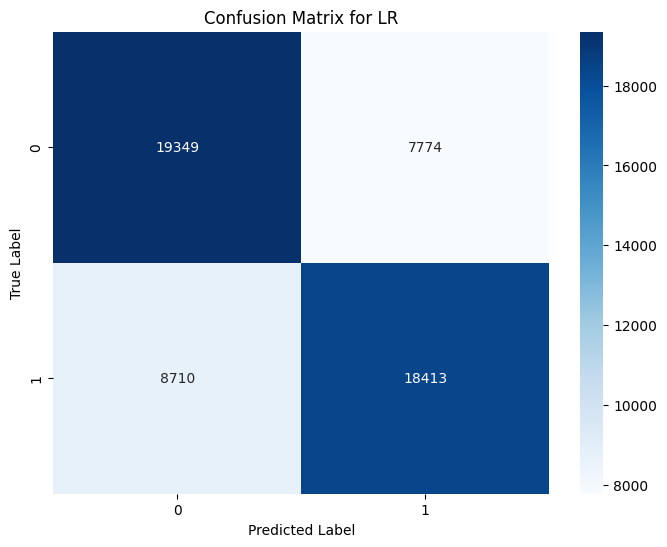

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LR')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**RF**

In [ ]:
rf_clf = RandomForestClassifier(criterion='entropy', random_state=42)
rf_result = cross_validate(rf_clf, X_Train, y_Train, cv=kf, scoring=scoring)

print(f"Mean Accuracy: {rf_result['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {rf_result['test_precision'].mean():.4f}")
print(f"Mean Recall: {rf_result['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {rf_result['test_f1'].mean():.4f}")
print(f"Mean AUC-ROC Score: {rf_result['test_roc_auc'].mean():.4f}")
print(f"Mean Specificity: {rf_result['test_specificity'].mean():.4f}")

Mean Accuracy: 0.8067
Mean Precision: 0.7906
Mean Recall: 0.8345
Mean F1 Score: 0.8120
Mean AUC-ROC Score: 0.8067
Mean Specificity: 0.7789


In [ ]:
rf_y_pred = cross_val_predict(rf_clf, X_Train, y_Train, cv=kf)
rf_cm = confusion_matrix(y_Train, rf_y_pred)
rf_cm

array([[21127,  5996],
       [ 4488, 22635]])

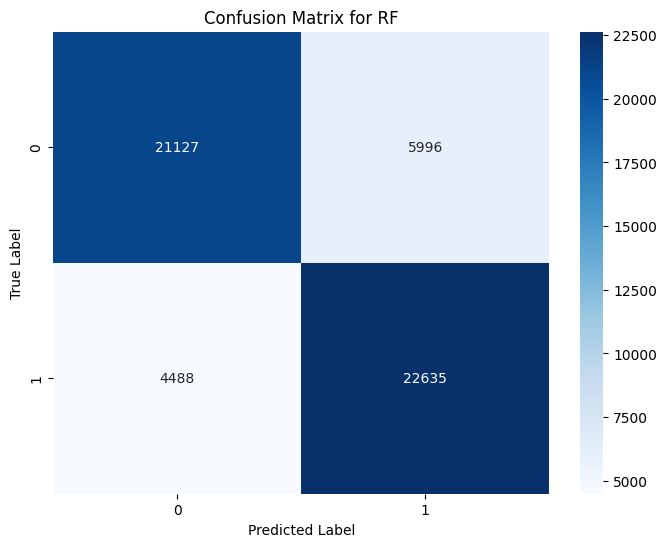

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**SVM**

In [ ]:
svm_clf = SVC(kernel='poly', random_state=42)
svm_result = cross_validate(svm_clf, X_Train, y_Train, cv=kf, scoring=scoring)

print(f"Mean Accuracy: {svm_result['test_accuracy'].mean():.4f}")
print(f"Mean Precision: {svm_result['test_precision'].mean():.4f}")
print(f"Mean Recall: {svm_result['test_recall'].mean():.4f}")
print(f"Mean F1 Score: {svm_result['test_f1'].mean():.4f}")
print(f"Mean AUC-ROC Score: {svm_result['test_roc_auc'].mean():.4f}")
print(f"Mean Specificity: {svm_result['test_specificity'].mean():.4f}")

Mean Accuracy: 0.7467
Mean Precision: 0.7297
Mean Recall: 0.7838
Mean F1 Score: 0.7558
Mean AUC-ROC Score: 0.7467
Mean Specificity: 0.7097


In [ ]:
svm_y_pred = cross_val_predict(svm_clf, X_Train, y_Train, cv=kf)
svm_cm = confusion_matrix(y_Train, svm_y_pred)
svm_cm

array([[19248,  7875],
       [ 5865, 21258]])

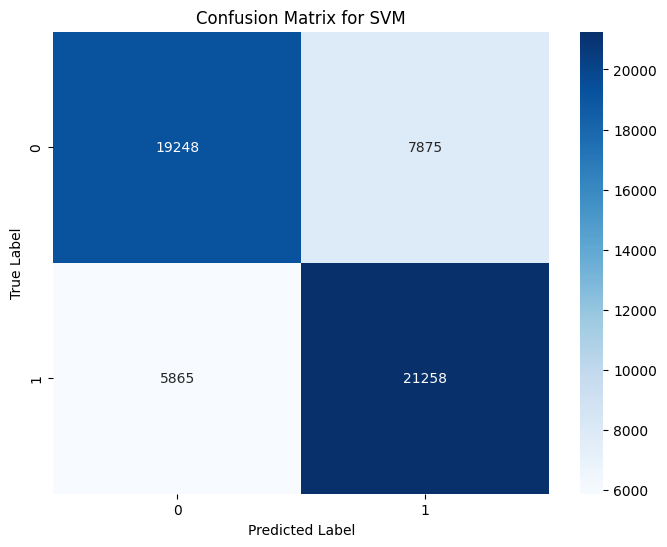

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Ensemble Voting Model**

In [ ]:
estimators = [('rf', rf_clf), ('lr', lr_clf), ('svm', svm_clf)]
model_weights = [0.5, 0.2, 0.3]
voting_clf = VotingClassifier(estimators=estimators, voting='hard', weights=model_weights)
voting_clf.fit(X_Train, y_Train)

y_Pred = voting_clf.predict(X_Test)

In [ ]:
# Evaluation
accuracy = accuracy_score(y_Test, y_Pred)
precision = precision_score(y_Test, y_Pred)
recall = recall_score(y_Test, y_Pred)
f1 = f1_score(y_Test, y_Pred)
roc_auc = roc_auc_score(y_Test, y_Pred)
specificity = specificity_score(y_Test, y_Pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("Specificity: {:.4f}".format(specificity))
print("ROC AUC Score: {:.4f}".format(roc_auc))

Accuracy: 0.7252
Precision: 0.8032
Recall: 0.7805
F1 Score: 0.7917
Specificity: 0.6134
ROC AUC Score: 0.6970


<Figure size 800x600 with 0 Axes>

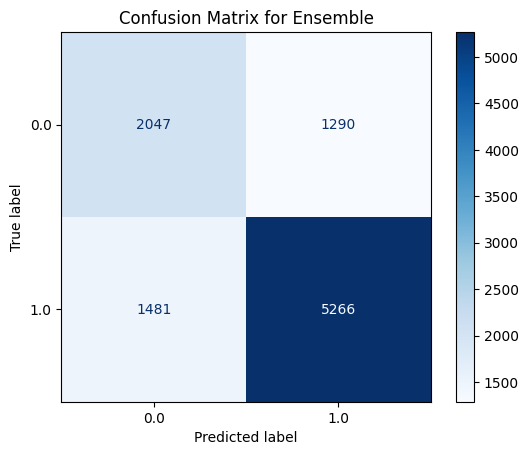

In [ ]:
mv_cm = confusion_matrix(y_Test, y_Pred)

from sklearn.metrics import ConfusionMatrixDisplay

mv_cm_display = ConfusionMatrixDisplay(confusion_matrix=mv_cm, display_labels=voting_clf.classes_)

plt.figure(figsize=(8, 6))
mv_cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ensemble')
plt.show()